# Gradient Descent 의 단점 해결 방안들에 대해 알아보겠습니다.

## 오늘 다룰 내용은 SGD, SGD with momentum, AdaGrad, RMSprop, Adam입니다.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

 우선 함수는 아래와 같이 주어집니다. 

In [2]:
def f(x):
    return x[0]**2/20 + x[1]**2      

위 함수($\frac{x_{0}^2}{20} + x_{1}^2$)의 최소값과 최소값을 만드는 입력값은 무엇입니까?

정답) $f(x_{0},x_{1})=\frac{x_{0}^2}{20} + x_{1}^2$ 에서 $ x_0 $이 0 $ x_1 $이 0이 되는 경우(굉장히 이상적인 경우)

위 함수의 3D wireframe과 2D Contour를 그리는 함수를 완성합니다.

In [3]:
def plot_points_on_contour(f,points=None):
    fig = plt.figure(figsize=(15,5))           # width 공간의 크기가 15, height 공간의 크기가 5 (단위 : inch) 인 Figure 인스턴스 생성

    ax1 = fig.add_subplot(121, projection='3d')    
    ax2 = fig.add_subplot(122)

    x = [np.linspace(-10,10,100), np.linspace(-10,10,100)] # -10 부터 10 까지의 100 개의 균일한 선형 공간 2개 생성

    X = np.meshgrid(x[0],x[1])           # 좌표 행렬로 변환 (x 좌표, y 좌표는 반드시 -10 과 10 사이의 100 개의 균일한 점들임...)
                                         # 해당 좌표 행렬은 100 x 100 즉, 10000 개의 좌표들을 의미
    Z = f(X)                             # 10000 개의 좌표들에 대한 스칼라 장에서의 스칼라 값을 구함


    # Plot a basic wireframe.
    ax1.plot_wireframe(X[0],X[1],Z)                               # 3D 서피스 플롯을 표현 (채우시오)              
    ax1.view_init(30,200)
    
    ax2.contour(X[0],X[1],Z,30)

    if points is not None:
        ax2.plot(points[0],points[1],color='#1F77B4', marker='o') # (채우시오)
    
    plt.show()

함수 f만 입력시 wireframe과 contour 그림이 출력됩니다.

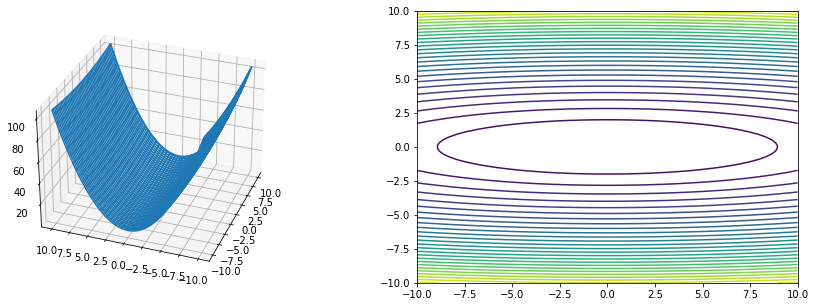

In [4]:
plot_points_on_contour(f)

함수와 각 점의 x,y축을 입력하면 그 부분이 contour 그림에 표시됩니다.

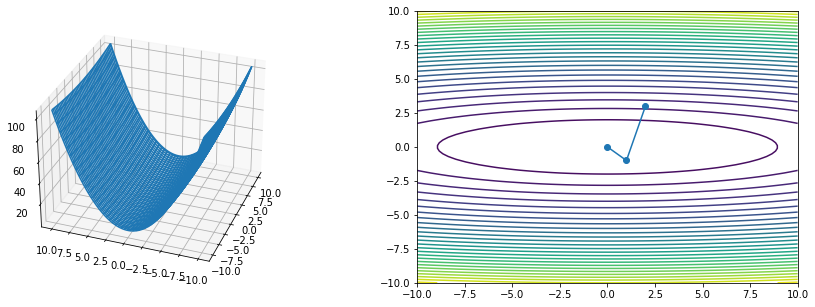

In [5]:
plot_points_on_contour(f, [[0,1,2],[0,-1,3]])

## 각가의 방식으로 주어진 함수를 최소로 만드는 x,y값을 찾아봅시다.

즉 위에서 계산한 입력값 x,y를 각 방법으로 찾을 수 있어야 합니다. 

아래 함수 GD는 함수, torch.Tensor 객체, learning_rate, num_step 를 입력으로 받아 3D wireframe과 2D contour에 x값이 어떻게 변화는지를 표시하여줍니다.

In [6]:
def GD(f, init_x, learning_rate, num_step):
    
    h=0
    x_rlt = []                   
    y_rlt = []                  

    for i in range(num_step):                

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        # init_x 의 값을 적절히 변경/갱신
        Z = f(init_x)
        Z.backward()
        dX_f = init_x.grad
        
        with torch.no_grad():
            h = h + dX_f*dX_f
            init_x = init_x - learning_rate *dX_f            

        init_x.requires_grad = True                       

    plot_points_on_contour(f, [x_rlt,y_rlt])              

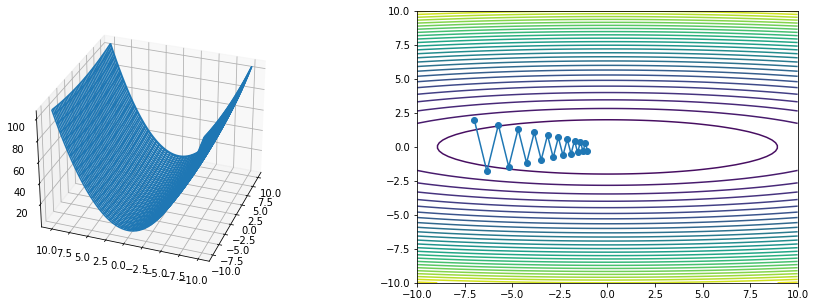

In [7]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32) 
GD(f,x,.95, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) learning_rate를 0.05씩 줄여 0.8까지 해본 결과 lr이 줄어들수록 수렴되는 과정이 매우 크게 차이가 난다.

torch.tensor([i,2]) i의 초기값이 -7보다 점점 커지면 (-6,-5,-4, ...) 점의 간격이 점점 적어진다.초기값이 -7보다 작아지면 간격이 넓어지고 왼쪽으로 향하게 되며 양수가 되면 [-7,2]와는 대칭 형태가 된다. 뿐만 아니라 값이 커질수록 간격이 넓어진다

아래 함수 GD_momentum는 함수, torch.Tensor 객체, learning_rate, num_step, momentum 계수를 입력으로 받아 3D wireframe과 2D contour에 x값이 어떻게 변화는지를 표시하여줍니다.

In [8]:
def GD_momentum(f, init_x, learning_rate, num_step, mom):

    v = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        # init_x 의 값을 적절히 변경/갱신
        Z = f(init_x)
        Z.backward()
        dX_f = init_x.grad

        with torch.no_grad():
            v = mom*v - learning_rate*dX_f
            init_x = init_x+v

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])
    

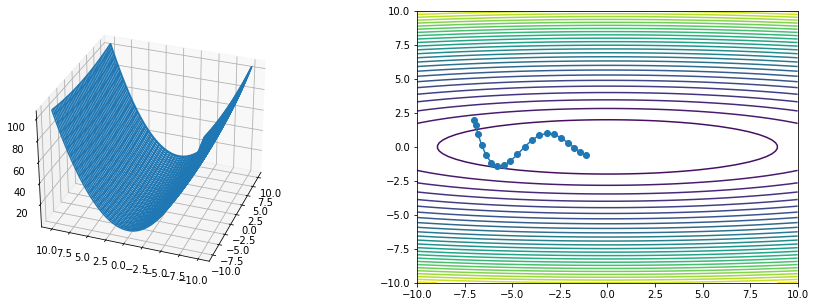

In [9]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)
GD_momentum(f,x,.1, 20, 0.9)

 위 결과에 learning_rate와 초기값, 모멘텀 계수을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) learning_rate를 0.3씩 늘려 0.8까지 해본 결과 (마지막에는 0.1)
lr을 늘릴수록 그래프가 매우 불규칙하게 된다. 점의 연결성을 찾을 수가 없다.

torch.tensor([i,2]) i의 초기값이 -7보다 점점 커지면 (-6,-5,-4, ...) 점의 간격이 점점 적어지면서 오른쪽으로 치우친다.양수가 되면 [-7,2]와는 대칭 형태가 된다.

모멘텀 계수는 0.1씩 줄여 0.7씩 해본 결과
그래프의 크기가 좌우로 점점 줄어들어 더 밀도 있게 되었다.정확한 가운데 지점에 수렴되던 것이 멀어진다.


In [10]:
def GD_AdaGrad(f, init_x, learning_rate, num_step):

    h = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):
        
        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        # init_x 의 값을 적절히 변경/갱신
        Z = f(init_x)
        Z.backward()
        dX_f = init_x.grad

        with torch.no_grad():
            h = h + dX_f*dX_f# 채우시오
            init_x = init_x - learning_rate*(1/(h**(1/2)))*dX_f

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

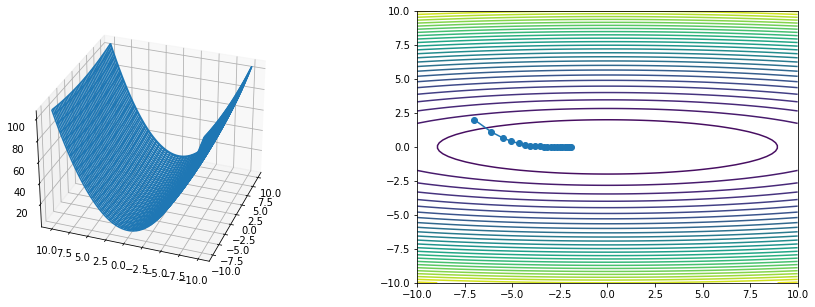

In [11]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)
GD_AdaGrad(f,x,.9, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답)learning_rate를 0.05씩 줄여 0.8까지 해본 결과
lr을 줄일수록 가득이나 좁은 점의 간격이 더 좁아진다.

torch.tensor([i,2]) i의 초기값이 -7보다 점점 커지면 (-6,-5,-4, ...) 점의 간격이 점점 적어지면서 오른쪽으로 치우친다.양수가 되면 [-7,2]와는 대칭 형태가 된다.[3,2]의 경우 더 빠르게 수렴하였다.


In [12]:
def GD_RMSprop(f,init_x, learning_rate, num_step, gamma):

    g = 0
    h = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        Z = f(init_x)
        Z.backward()
        dX_f = init_x.grad
        
        # 베타(여기서는 감마) = 0.9
        with torch.no_grad():
            g = (gamma*g) + ((1-gamma)*(dX_f*dX_f))# 채우시오
            init_x = init_x - learning_rate*(1/(g**(1/2)))*dX_f
           # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

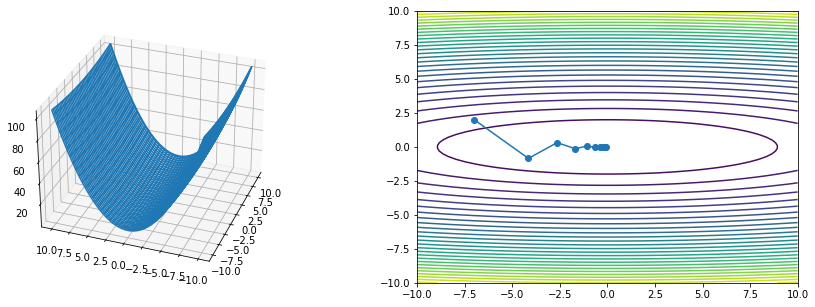

In [13]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)
GD_RMSprop(f,x,.9, 10, 0.9)

 위 결과에 learning_rate와 초기값, gamma 을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답)learning_rate를 0.05씩 줄여 0.8까지 해본 결과
lr을 줄일수록 더 스무스한 결과를 얻게됨 특히 두번째 지점과 세번째 지점에서 두드러짐

torch.tensor([i,2]) i의 초기값이 -7보다 점점 커지면 (-6,-5,-4, ...) 점의 간격이 점점 적어진다.양수가 되면 오른쪽으로 기울기가 향한다. -7보다 작아지면 점 찍히는 것이 왼쪽으로 쏠리게 된다.

gamma를 0.05씩 줄여 0.8까지 해본 결과
lr을 줄인것과 마찬가지로 편차가 더 적어져 스무스한 결과를 얻게됨. 특히 0.8까지 내리면 두번째 점부터는 거의 flat한 형태를 보임


In [14]:
def GD_Adam(f,init_x, learning_rate, num_step, beta_1, beta_2):
    # num_step      : 학습의 반복 횟수
    m = 0
    v = 0
    m_hat=0
    v_hat=0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):
        
        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())
      
        # loss 함수를 정의하고 미분하시오
        Z = f(init_x)
        Z.backward()
        dX_f = init_x.grad
        #베타 1 0.9
        #베타 2 0.9 진행
        with torch.no_grad():
            m= beta_1*m+(1-beta_1)*dX_f
            v=(beta_2*v) + ((1-beta_2)*(dX_f*dX_f))
            m_hat=m/(1-(pow(beta_1,i+1)))
            v_hat=v/(1-(pow(beta_2,i+1)))
            init_x=init_x-m_hat*(learning_rate/(np.sqrt(v_hat)+1e-10))
            # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

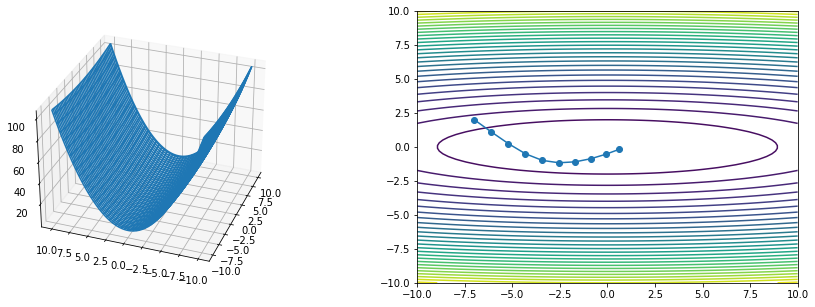

In [15]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)
GD_Adam(f,x,0.9, 10, 0.9, 0.9)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답)learning_rate를 0.05씩 줄여 0.8까지 해본 결과
lr을 줄일수록 U자 형태가 아니라 y=-x 형태를 띄게 됨

torch.tensor([i,2]) i의 초기값이 -7보다 점점 커지면 (-6,-5,-4, ...) 그래프 끝부분이 커브가 된다.-7보다 작아지면 점 찍히는 것이 왼쪽으로 쏠리게 된다. 양수시에는 그래프가 오른쪽으로 쏠리게 된다.

gamma를 각각 0.05씩 줄여 0.7까지 해본 결과
U자 형태가 점점 풀어지기는 하나 뚜렷하게 차이를 느끼지 못했다. 0.3부터 U자 모양이 아예 풀리더니 0.1에 가서는 아예 지그재그 모양이 되었다.


## 새로운 함수에 대해 위 작업을 반복해보자

In [16]:
def g(x):
    return x[0]**4 + x[1]**4 + 5*x[0]**3  - 40*(x[0]-1)**2 - 40*(x[1]-1)**2

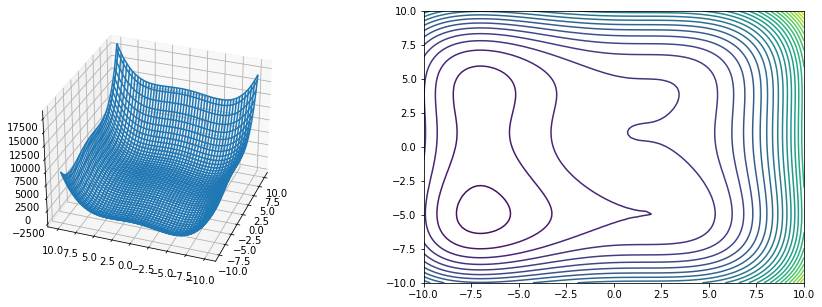

In [17]:
plot_points_on_contour(g)

위 함수의 최소값를 갖는 입력값은 대략 어디인가?

정답) (x[0], x[1])가 대략(1,1)일때 최소값을 갖는다.

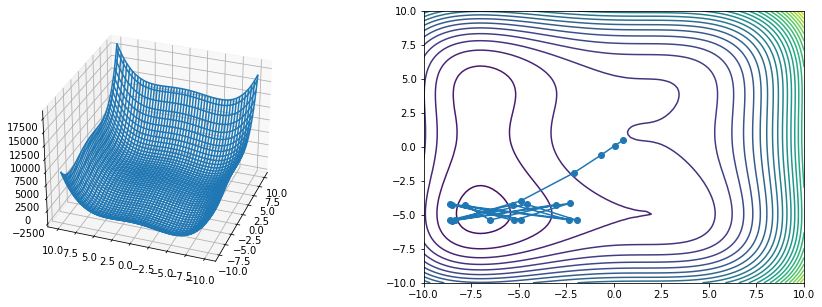

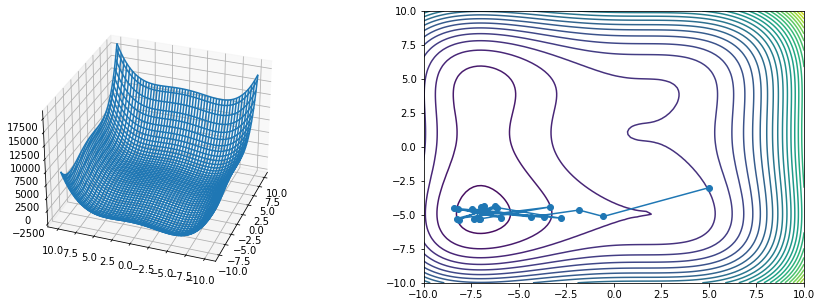

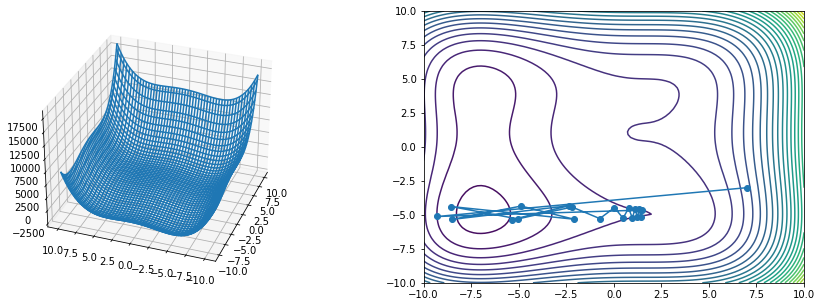

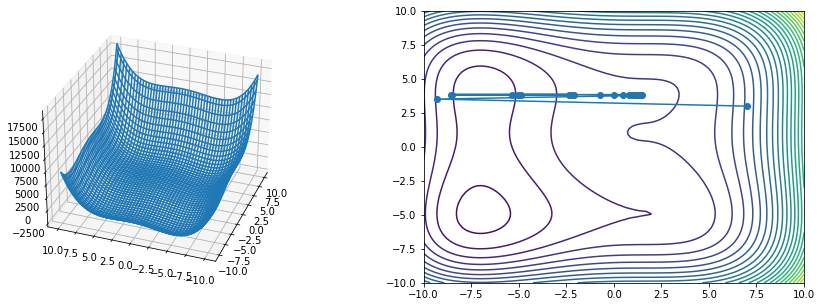

In [18]:
x = torch.tensor([0.5,0.5], requires_grad = True, dtype=torch.float32)
GD(g,x,0.01,20)

x = torch.tensor([5,-3], requires_grad = True, dtype=torch.float32)
GD(g,x,0.01,20)

x = torch.tensor([7,-3], requires_grad = True, dtype=torch.float32)
GD(g,x,0.01,20)

x = torch.tensor([7,3], requires_grad = True, dtype=torch.float32)
GD(g,x,0.01,20)



 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답)

lr의 값이 커지면 등고선 형태를 벗어난다.

초기값의 경우 x를 양수로 늘릴수록 오른쪽으로 튀는 점의 값 크기가 커져 빠르게 수렴한다고 해석하기 어렵다. y를 음수로 줄일수록 아래로 내려온다.
y의 값이 특정이상으로 커지면 목표 지점으로 수렴 되지 못한다.

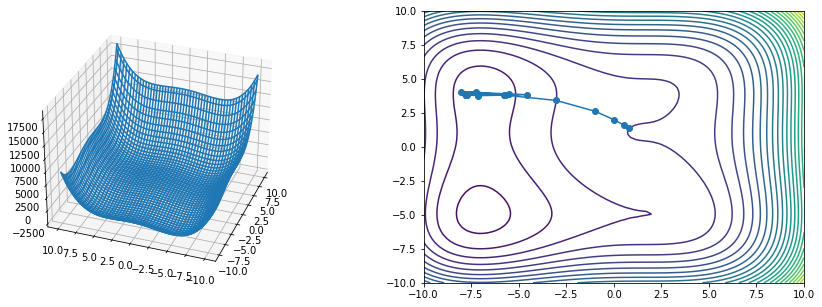

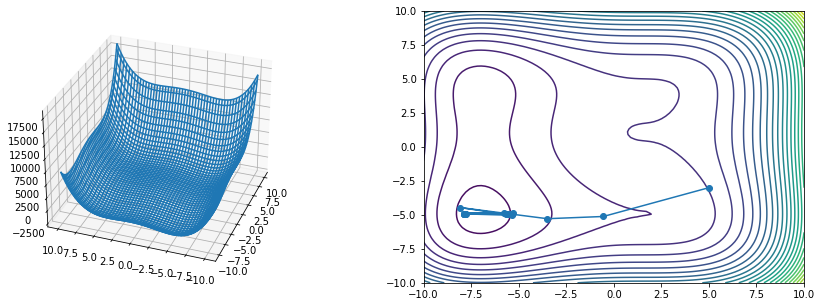

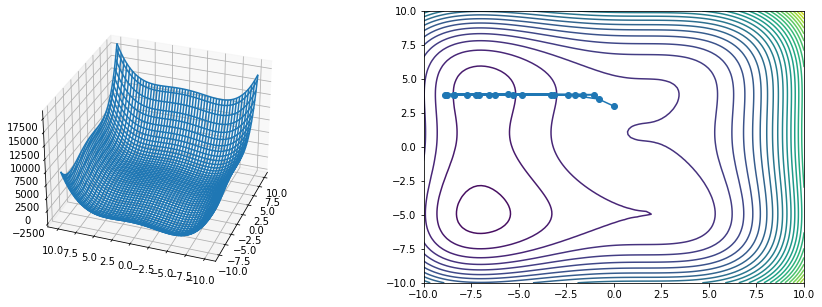

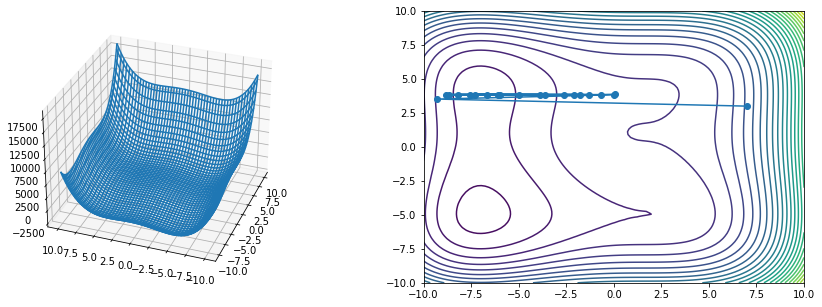

In [19]:
x = torch.tensor([0.8,1.4], requires_grad = True, dtype=torch.float32)
GD_momentum(g,x,0.01, 20, 0.35)

x = torch.tensor([5,-3], requires_grad = True, dtype=torch.float32)
GD_momentum(g,x,0.01, 20, 0.3)

x = torch.tensor([0,3], requires_grad = True, dtype=torch.float32)
GD_momentum(g,x,0.01, 20, 0.09)

x = torch.tensor([7,3], requires_grad = True, dtype=torch.float32)
GD_momentum(g,x,0.01, 20, 0.09)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답)

GD와 마찬가지로

lr의 값이 커지면 등고선 형태를 벗어난다.

초기값의 경우 x를 양수로 늘릴수록 오른쪽으로 튀는 점의 값 크기가 커진다. y를 음수로 줄일수록 아래로 내려온다. 즉 y가 커질수록 목표지점에서 수렴한다고 볼 수 없다.

단, 같은 초기값으로 비교해보았을 때, GD에 비해 점의 간격이 소폭 늘어나, 겹치는 것이 조금 덜하다

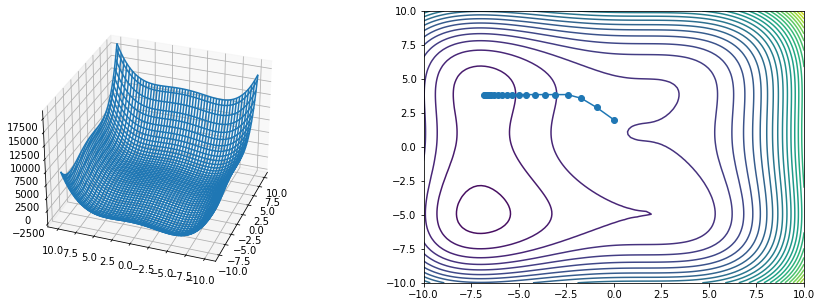

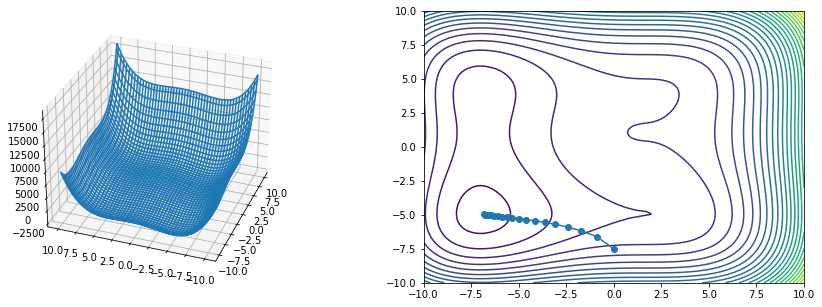

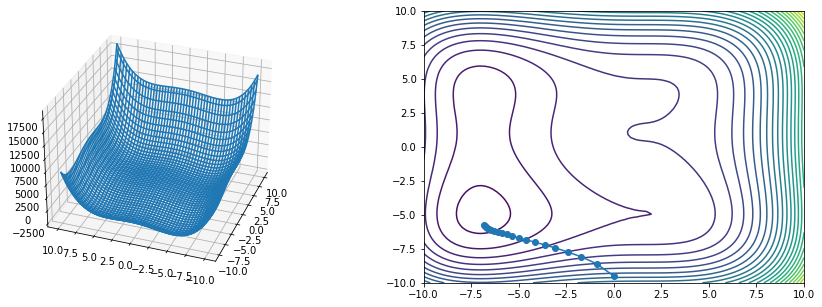

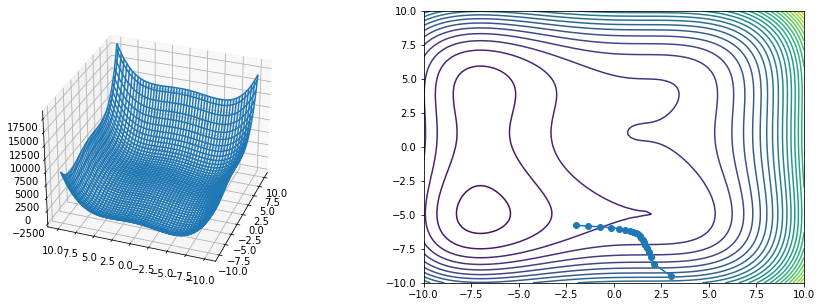

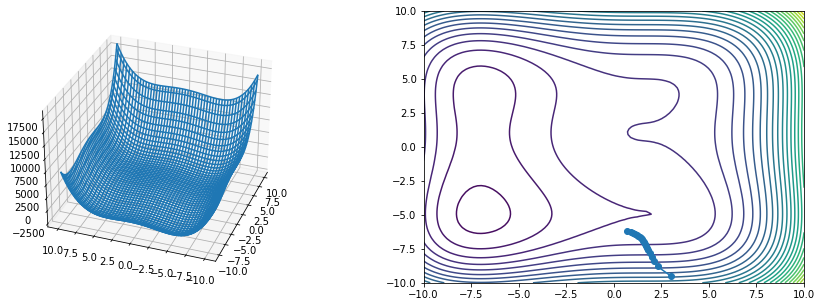

In [20]:
x = torch.tensor([0,2], requires_grad = True, dtype=torch.float32)
GD_AdaGrad(g,x,0.9, 20)

x = torch.tensor([0,-7.5], requires_grad = True, dtype=torch.float32)
GD_AdaGrad(g,x,0.9, 20)

x = torch.tensor([0,-9.5], requires_grad = True, dtype=torch.float32)
GD_AdaGrad(g,x,0.9, 20)

x = torch.tensor([3,-9.5], requires_grad = True, dtype=torch.float32)
GD_AdaGrad(g,x,0.9, 20)

x = torch.tensor([3,-9.5], requires_grad = True, dtype=torch.float32)
GD_AdaGrad(g,x,0.7, 20)

#x = torch.tensor([3,-9.5], requires_grad = True, dtype=torch.float32)
#GD_AdaGrad(g,x,0.5, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답)

lr의 경우 lr을 줄일수록 그래프 점의 간격이 촘촘하게 줄어든다.

초기값의 경우 x를 양수로 늘릴수록 오른쪽으로 그래프가 쏠리고 y를 음수로 줄일수록 아래로 내려온다.
x와 y의 값이 특정이상으로 커지면 목표 지점에 수렴하지 못한다.


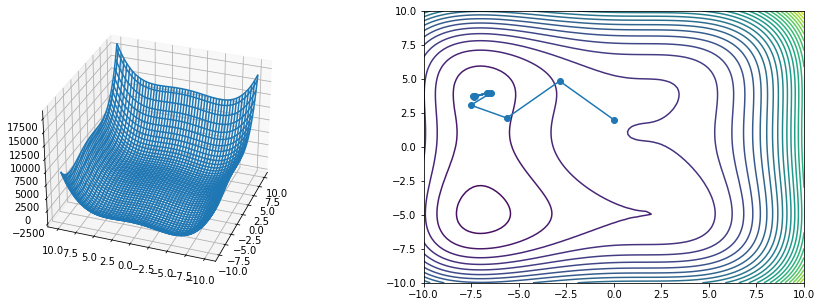

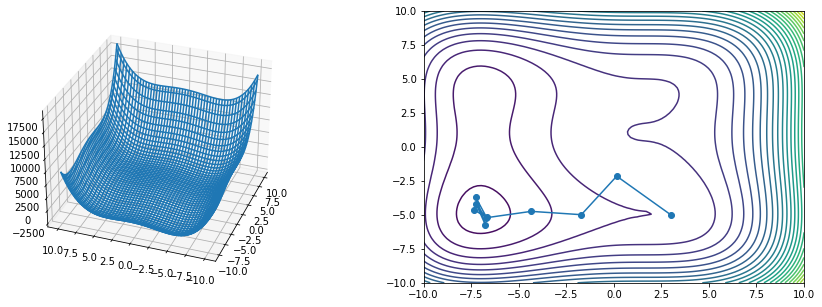

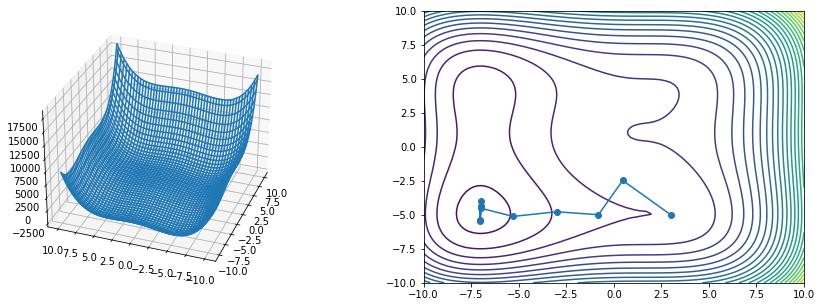

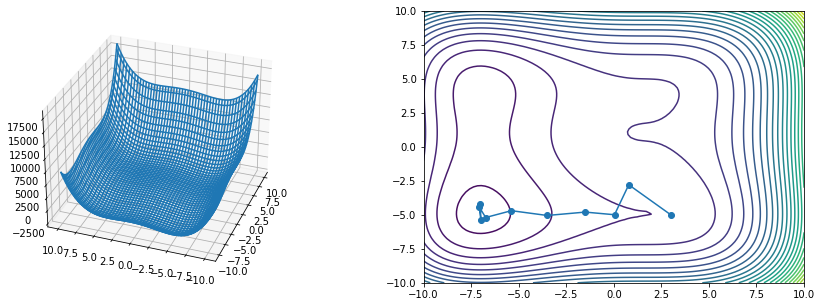

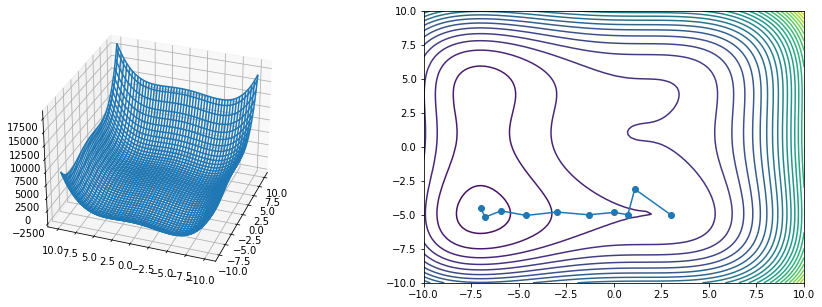

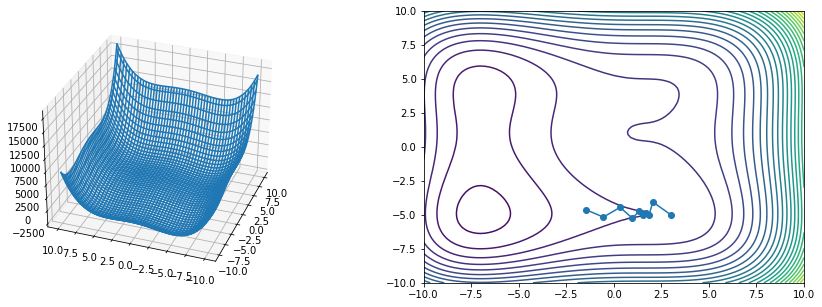

In [21]:
x = torch.tensor([0,2], requires_grad = True, dtype=torch.float32)
GD_RMSprop(g,x,.9, 10, 0.9)

#x = torch.tensor([0,-2], requires_grad = True, dtype=torch.float32)
#GD_RMSprop(g,x,.9, 10, 0.9)

#x = torch.tensor([3,-2], requires_grad = True, dtype=torch.float32)
#GD_RMSprop(g,x,.9, 10, 0.9)

x = torch.tensor([3,-5], requires_grad = True, dtype=torch.float32)
GD_RMSprop(g,x,.9, 10, 0.9)
x = torch.tensor([3,-5], requires_grad = True, dtype=torch.float32)
GD_RMSprop(g,x,.8, 10, 0.9)
x = torch.tensor([3,-5], requires_grad = True, dtype=torch.float32)
GD_RMSprop(g,x,.7, 10, 0.9)

x = torch.tensor([3,-5], requires_grad = True, dtype=torch.float32)
GD_RMSprop(g,x,.6, 10, 0.9)

x = torch.tensor([3,-5], requires_grad = True, dtype=torch.float32)
GD_RMSprop(g,x,.6, 10, 0.6)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 

lr을 줄일수록 겹쳐있던 점이 간격을 벌린다.즉 빠르게 값이 변한다.

초기값에서 x 값 크기를 크게할수록 점의 간격이 점점 벌어진다. y 값이 음수일수록 그래프가 아래로 향한다.
여기서도 x와 y 값이 커지면 목표 지점에 수렴하기가 어렵다. 단 감마 값을 변경하여 이를 수렴하게 만들수도 있다.

참고, 감마 값이 줄면 급격하게 그래프가 겹치기 시작해서 뻗어나가지를 못해 수렴이 어렵다.

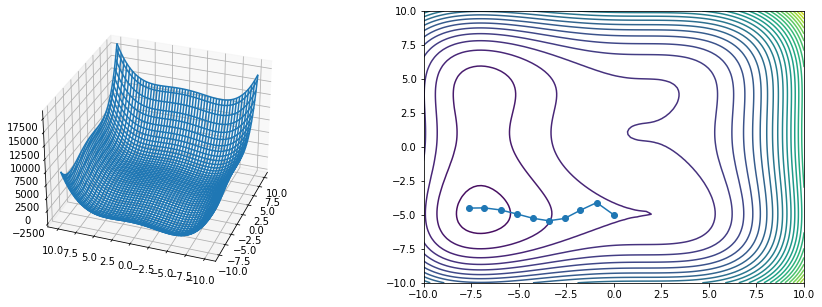

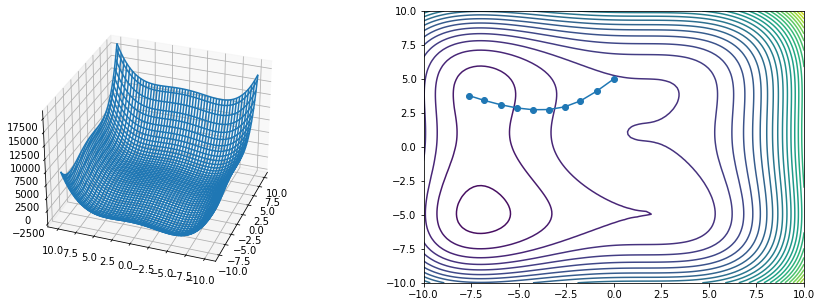

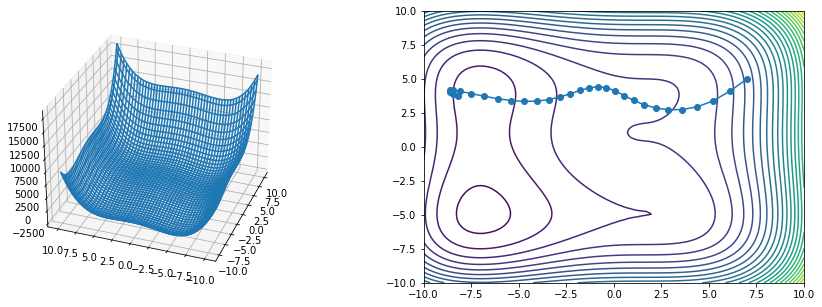

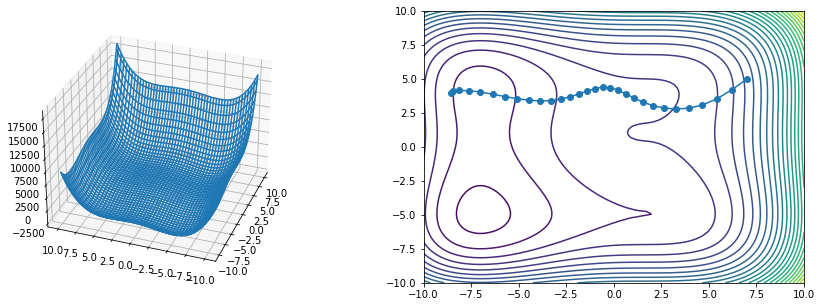

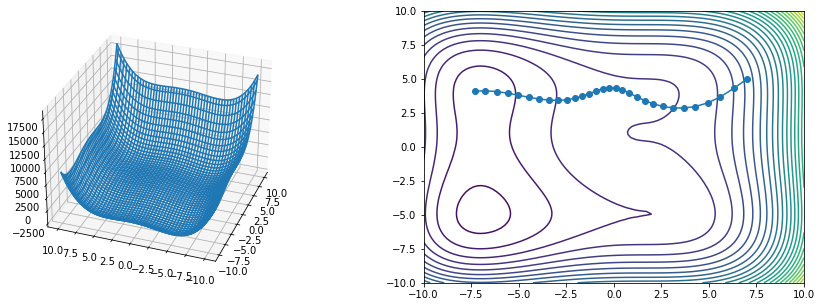

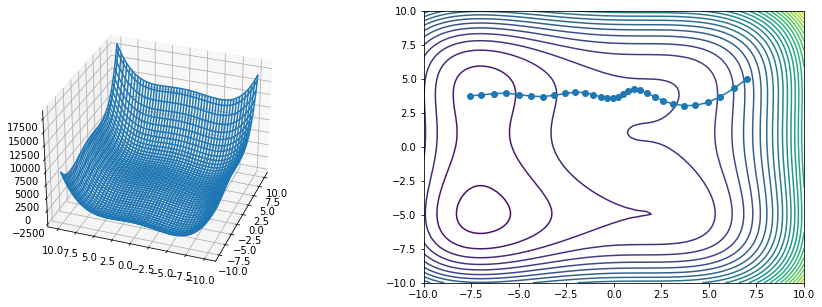

In [23]:
x = torch.tensor([0,-5], requires_grad = True, dtype=torch.float32)
GD_Adam(g,x,0.9, 10, 0.9, 0.9)

x = torch.tensor([0,5], requires_grad = True, dtype=torch.float32)
GD_Adam(g,x,0.9, 10, 0.9, 0.9)

x = torch.tensor([7,5], requires_grad = True, dtype=torch.float32)
GD_Adam(g,x,0.9, 30, 0.9, 0.9)

x = torch.tensor([7,5], requires_grad = True, dtype=torch.float32)
GD_Adam(g,x,0.8, 30, 0.9, 0.9)

x = torch.tensor([7,5], requires_grad = True, dtype=torch.float32)
GD_Adam(g,x,0.7, 30, 0.9, 0.9)

x = torch.tensor([7,5], requires_grad = True, dtype=torch.float32)
GD_Adam(g,x,0.7, 30, 0.8, 0.8)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 

lr을 줄일수록 그래프 왼쪽 부분이 오른쪽으로 향한다.

초기값에서 x 값 크기를 크게할수록 길이가 길어진다. y 값이 음수일수록 그래프가 아래로 향한다.
x와 y의 값이 특정이상으로 커지면 목표지점에 수렴하기 어렵다.

참고, 베타의 경우 줄일수록, 그래프의 점이 점점 겹친다. 이 경우 초기 값만 잘 설정했다면 수렴의 가능성은 존재하는 듯 보인다.